In [398]:
import torch

In [399]:
# https://rockt.github.io/2018/04/30/einsum
# dont do extra tricky stuff with einsum!
# and still check on forward pass if it is how it should be.

# use same dimesnion if you want them underneath the summation sign

In [400]:
M = torch.randint(low=1,high=5,size=(5,3))
M, M.dtype

(tensor([[4, 2, 3],
         [2, 2, 2],
         [2, 1, 3],
         [1, 2, 4],
         [4, 2, 3]]),
 torch.int64)

In [401]:
# 1 . matrix transpose
torch.einsum("ij -> ji",[M]) , M.T


(tensor([[4, 2, 2, 1, 4],
         [2, 2, 1, 2, 2],
         [3, 2, 3, 4, 3]]),
 tensor([[4, 2, 2, 1, 4],
         [2, 2, 1, 2, 2],
         [3, 2, 3, 4, 3]]))

In [402]:
# sum all elements 
torch.einsum("ij ->",[M]) , torch.sum(M)

(tensor(37), tensor(37))

In [403]:
# lets calculate l2 norm trace(A' A)
# this pretty tricky actually.. einsum("ii" , M) is the trace of M
torch.einsum("ij,ij-> ",M,M) , torch.trace(M.T @ M)

(tensor(105), tensor(105))

In [404]:
# in more steps ? we want it to be summed over i
torch.einsum("ij,ik->jk",M,M), M.T @ M 

(tensor([[41, 24, 38],
         [24, 17, 27],
         [38, 27, 47]]),
 tensor([[41, 24, 38],
         [24, 17, 27],
         [38, 27, 47]]))

In [405]:
# Matrix vector/matrix multiplication
v = torch.randint(1,10,size=(3,1))
torch.einsum("ij ,jk -> ik",M,v) ,M @ v

(tensor([[56],
         [40],
         [40],
         [52],
         [56]]),
 tensor([[56],
         [40],
         [40],
         [52],
         [56]]))

In [406]:
# sum along rows
torch.einsum("ij -> j",M) , M.sum(dim=0)

(tensor([13,  9, 15]), tensor([13,  9, 15]))

In [407]:
# sum along columns
torch.einsum("ij -> i",M) , M.sum(dim=1)

(tensor([9, 6, 6, 7, 9]), tensor([9, 6, 6, 7, 9]))

In [408]:
# hadamard
torch.einsum("ij,ij -> ij",M,M) , M * M

(tensor([[16,  4,  9],
         [ 4,  4,  4],
         [ 4,  1,  9],
         [ 1,  4, 16],
         [16,  4,  9]]),
 tensor([[16,  4,  9],
         [ 4,  4,  4],
         [ 4,  1,  9],
         [ 1,  4, 16],
         [16,  4,  9]]))

In [409]:
# hadamard sum
torch.einsum(("ij , ij -> "),M,M) , (M*M).sum()

(tensor(105), tensor(105))

In [410]:
# outer product
torch.einsum("ik,jk -> ij",v,v), v @ v.T

(tensor([[16, 32, 32],
         [32, 64, 64],
         [32, 64, 64]]),
 tensor([[16, 32, 32],
         [32, 64, 64],
         [32, 64, 64]]))

In [411]:
# batch matrix multiplication (real deal)
a = torch.randn(2,2,5) # 2eg with 2,5 matrix -> 2eg with 2,3 
b = torch.randn(5,3)
torch.einsum('bjk,kl->bjl', [a, b]) , a @ b

(tensor([[[-4.8676, -2.9266,  0.4376],
          [-5.4576, -3.1316, -1.9081]],
 
         [[ 0.1732, -0.6392, -0.2592],
          [ 0.6326, -0.2148,  1.8888]]]),
 tensor([[[-4.8676, -2.9266,  0.4376],
          [-5.4576, -3.1316, -1.9081]],
 
         [[ 0.1732, -0.6392, -0.2592],
          [ 0.6326, -0.2148,  1.8888]]]))

In [412]:
# tensor contraction.. i dont like squeeze and unsqueeze methods
a = torch.randn(2,3,5,7)
b = torch.randn(11,13,3,17,5)
torch.einsum('pqrs,tuqvr->pstuv', [a, b]).shape

torch.Size([2, 7, 11, 13, 17])

In [413]:
# you can squeeze out with einsum but you cant unsqueeze with einsum
# this does not work
# torch.einsum("ij -> 1ij", v).shape ,v.shape , v.unsqueeze(0).shape

In [414]:
import einops

In [415]:
# einops utils
import numpy as np

from PIL.Image import fromarray
from IPython import get_ipython
from IPython.display import display_html


def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print("<array of shape {}>".format(obj.shape))

    get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)


_style_inline = """<style>
.einops-answer {
    color: transparent;
    padding: 5px 15px;
    background-color: #def;
}
.einops-answer:hover { color: blue; }
</style>
"""


def guess(x):
    display_html(
        _style_inline + "<h4>Output is: <span class='einops-answer'>{x}</span> (hover to see)</h4>".format(x=tuple(x)),
        raw=True,
    )

In [416]:
# part1
x = torch.randn(0,2,3,1)

In [417]:
y = einops.rearrange(x,"b h w c -> b c h w")
print(x.shape , y.shape)

torch.Size([0, 2, 3, 1]) torch.Size([0, 1, 2, 3])


In [418]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
# from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [419]:
ims = numpy.load('test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


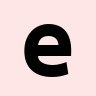

In [420]:
ims[0]

In [421]:
ims[0].shape

(96, 96, 3)

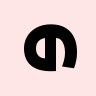

In [422]:
# lets transpose this image
# now obviously we dont want to do it in the color channels.
# how do we make that explicit
einops.rearrange(ims[0],"height width channel -> width height channel")

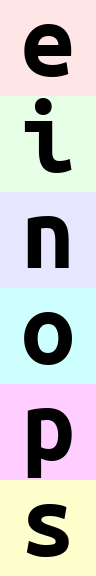

In [423]:
# composition or flattening axes
# new height becomes batch * height so its stacked along the rows here.
einops.rearrange(ims, "b h w c -> (b h) w c")

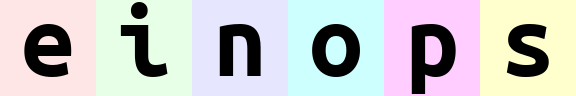

In [424]:
# stack them along the columns ? 
einops.rearrange(ims, "b h w c -> h (b w) c")

In [425]:
# flatten them all ?
einops.rearrange(ims, "b h w c -> (b h w c)").shape

(165888,)

In [426]:
# decomposition of new axes
# you can think of each batches now has 3 images
batches = einops.rearrange(ims, "(b1 b2) h w c -> b1 b2 h w c", b1 = 2 ,b2 = 3)
batches

<array of shape (2, 3, 96, 96, 3)>


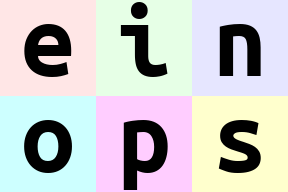

In [427]:
# lets print out each batch in its own row
einops.rearrange(batches, "b1 b2 h w c -> (b1 h) (b2 w) c")

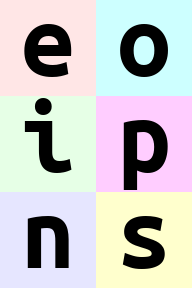

In [428]:
# we could also have put them in its own column
einops.rearrange(batches, "b1 b2 h w c -> (b2 h) (b1 w) c")

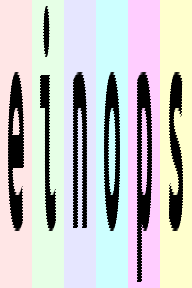

In [429]:
# move part of the width to height ? 
# we will give away the batch dimension to widh 
einops.rearrange(ims, "b h (w w_f) c ->  (h w_f) (b w) c", w_f = 3)

## order of axes matter ... very important to not get confused

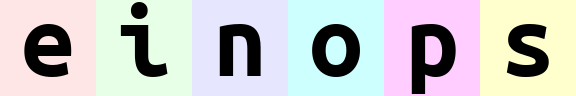

In [430]:
# important to note what exactly is happening here : 
einops.rearrange(ims, "b h w c -> h (b w) c")

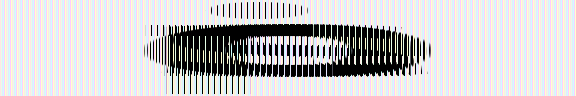

In [431]:
# its pretty easy to make this mistake double check the ordering.
einops.rearrange(ims, "b h w c -> h (w b) c")

In [432]:
np.array( torch.randn(30,30))

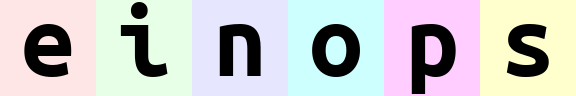

In [433]:
# what if b1 and b2 are reordered before composing to width?
einops.rearrange(ims, '(b1 b2) h w c -> h (b1 b2 w) c ', b1=2) # produces 'einops '
# b1 = 2 , b2 = 3 # two batches each with 3 images

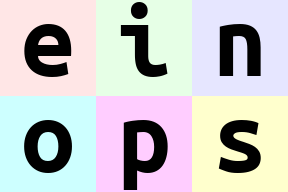

In [434]:
# lets look it step by step
# for now ignore b1 h .. think of it as representing each batch
# so when we left multiply b2 each batch becomes :
einops.rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

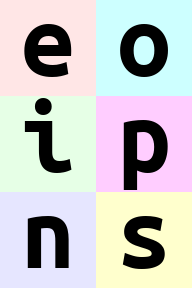

In [435]:
# now each batch is 2 left multiplied
einops.rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2) # produces 'einops '

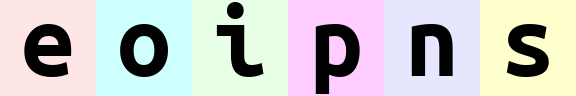

In [436]:
# so if the above gets flattened we get this.
einops.rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2) # produces 'eoipns'

## Reducing

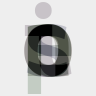

In [437]:
ims.mean(0) # averaging across batches .. but is it explicit enough

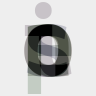

In [438]:
einops.reduce(ims,"b h w c -> h w c", "mean") # if the dimension is missing in the output then its being reduced .. here batches by averagin

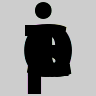

In [439]:
# this does not mean that it will return an example whose pixel summation is the minimum
# this means give me the minimum of each pixel and channel of all images ..
einops.reduce(ims, "b h w c -> h w c","min")

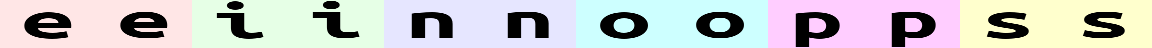

In [440]:
# before looking at mean pooling lets look at this.
# each image gets halved in height . and then put to the side by left multiplying it
einops.rearrange(ims, 'b (h h2) w  c -> h (b h2 w) c', h2=2)

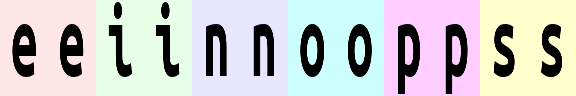

In [441]:
# each image gets halved in width and then put to the side
einops.rearrange(ims, 'b h (w w2)  c -> h (b w2 w) c', w2=2)

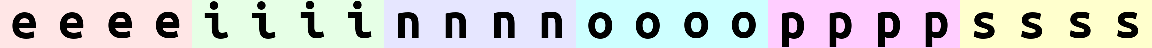

In [442]:
# now obviously we can do both at the same time
# now its important to see that each image was halved by width first (atleast concat first)
einops.rearrange(ims, "b (h h2) (w w2) c -> h (b h2 w2 w) c",h2 = 2 , w2 = 2)

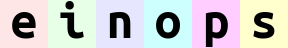

In [443]:
# now we can see pooling here you cant really see the effect cuz its the same image
# this is mean-pooling with 2x2 kernel
# image is split into 2x2 patches, each patch is averaged
einops.reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)


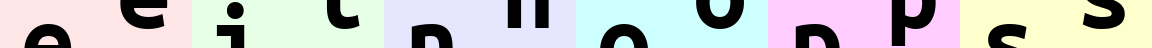

In [444]:
# this is something we had kinda do it in vision transformer ..
# see how placing a factor on the left on the input means cropping
einops.rearrange(ims, "b (p h) w c ->  h (b p w) c", p = 2)

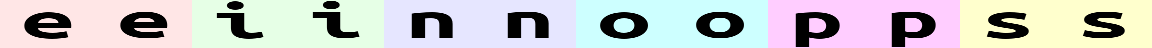

In [445]:
# but placing the factor on the right means rescaling
einops.rearrange(ims, "b (h p) w c ->  h (b p w) c", p = 2)

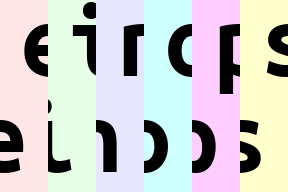

In [446]:
# actually its cropping but its just gets stacked so you cant see width being cropped in 2 here
einops.rearrange(ims, "b  h  (p w) c ->  (p h) (b w) c", p = 2)

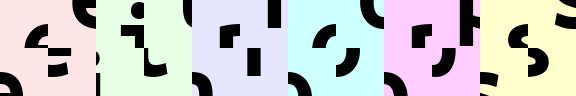

In [447]:
# what we actually want is a 16 * 16 patch.. 
# for a 32 * 32 image it just means we need to crop the height and width each 2 times
# printing in the wrong order to show the 4 crops
einops.rearrange(ims, "b (p1 h) (p2 w) c -> (p2 h) (b p1 w) c" , p1 = 2, p2 = 2)

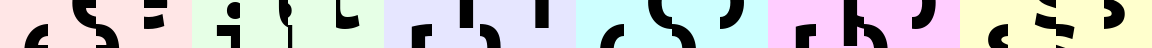

In [466]:
# you wont see any cropping if it was printed in the right order
einops.rearrange(ims, "b (p1 h) (p2 w) c -> h (b p2 p1 w) c" , p1 = 2, p2 = 2)

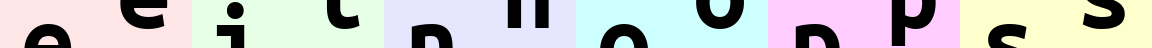

In [467]:
# this is what we want in vision transformer.
einops.rearrange(ims, "b (p1 h) (p2 w) c -> h (b p1 p2 w) c" , p1 = 2, p2 = 2)

In [449]:
# stack and reduce

In [450]:
# rearrange can also take care of lists of arrays with the same shape
x = list(ims)
print(type(x), 'with', len(x), 'tensors of shape', x[0].shape)
# that's how we can stack inputs
# "list axis" becomes first ("b" in this case), and we left it there
einops.rearrange(x, 'b h w c -> b h w c').shape

<class 'list'> with 6 tensors of shape (96, 96, 3)


(6, 96, 96, 3)

In [451]:
# but sometimes like pytorch .. they want channel to be the second dimension
einops.rearrange(x, "b h w c -> b c h w").shape

(6, 3, 96, 96)

In [452]:
# Addition or removal of axis to squeeze or to unsqueeze 😅

In [453]:
einops.rearrange(x,"b h w c -> b 1 h 1 w 1 c").shape # adding dimension before every feature

(6, 1, 96, 1, 96, 1, 3)

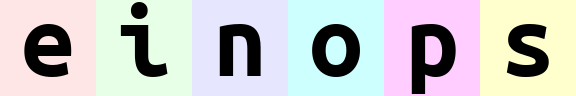

In [454]:
einops.rearrange(ims, "b h w c -> h (b w) c")

In [455]:
# now if i want to switch the foreground and the background color
# this is a tough one..
maxed = einops.reduce(ims,"b h w c -> b () () c","max") # this obviously returns b , 1 , 1 ,c
# that is the max value of each image in each channel
# you want to see the colours gotten
print(maxed.shape)
colors = einops.rearrange(maxed, "b 1 1 c -> b c")
print(colors) # the rgbs..

(6, 1, 1, 3)
[[1.         0.90196078 0.90196078]
 [0.90196078 1.         0.90196078]
 [0.90196078 0.90196078 1.        ]
 [0.80392157 1.         1.        ]
 [1.         0.80392157 1.        ]
 [1.         1.         0.80392157]]


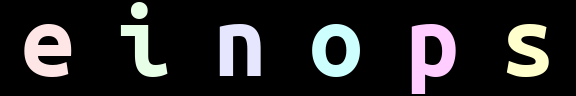

In [456]:
# if we subtract maxed to the original we should get
ans = maxed - ims
einops.rearrange(ans,"b h w c -> h (b w) c")

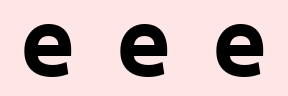

In [457]:
# repeat along (concat)
einops.repeat(ims[0],"h w c -> h (3 w) c")

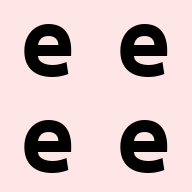

In [458]:
# go menal
einops.repeat(ims[0],"h w c -> (2 h) (2 w) c")

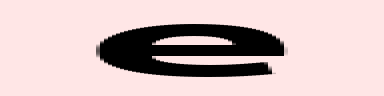

In [459]:
# member.. order matters.. instead of repeating we can instead end up stretching
# right multiplying factor in the output.. is stretching (use for upsampling)
# left multiplying is repeating

# left in the input is cropping
# right in the input is also streching (downsampling)
einops.repeat(ims[0],"h w c -> h (w 4) c")

In [460]:
# reduce and repeat are the same
repeated = einops.repeat(ims, "b h w c -> b 2 h w c")
reduced = einops.reduce(repeated, "b 2 h w c -> b h w c", "min") # here the reduciton method doesnt really matter all method produces the same
np.array_equal(ims, reduced)

True

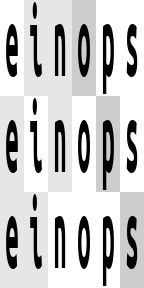

In [461]:
einops.reduce(ims, 'b h (w 4) c -> (c h) (b w)', 'mean')

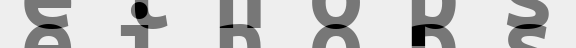

In [462]:
# h1 is 2 and is in the input. so height gets cropped in half.
# and we see that in new row
einops.reduce(ims, 'b (h1 h2) w c -> h2 (b w)', 'mean', h1=2) # h2 is inferred to 48

In [463]:
## Tutorial 2
# with deep learning framework
import torch

In [464]:
x = torch.randn(10,32,100,200)
guess(
    einops.rearrange(x,"b h w c -> b w h c").shape
)

Output is: (10, 100, 32, 200) (hover to see)

In [465]:
type(ims)

numpy.ndarray